In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Credit Card Customer Data.csv")
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [ ]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [ ]:
df1=df.drop('Sl_No',axis=1)

In [ ]:
x=df1.iloc[:,:-1]
x

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online
0,87073,100000,2,1,1
1,38414,50000,3,0,10
2,17341,50000,7,1,3
3,40496,30000,5,1,1
4,47437,100000,6,0,12
...,...,...,...,...,...
655,51108,99000,10,1,10
656,60732,84000,10,1,13
657,53834,145000,8,1,9
658,80655,172000,10,1,15


In [ ]:
y=df.iloc[:,-1]
y

0      0
1      9
2      4
3      4
4      3
      ..
655    0
656    2
657    1
658    0
659    2
Name: Total_calls_made, Length: 660, dtype: int64

In [ ]:
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,11):
  data=KMeans(n_clusters=i,init='k-means++',random_state=42)
  data.fit(x)
  WCSS.append(data.inertia_)
print(WCSS)

[1365751177183.4834, 748433676577.7594, 453755664380.07574, 288372354983.4954, 228010360611.1717, 182010780497.52588, 154608116881.24408, 136442396596.21185, 122745929571.91037, 107835942103.59265]


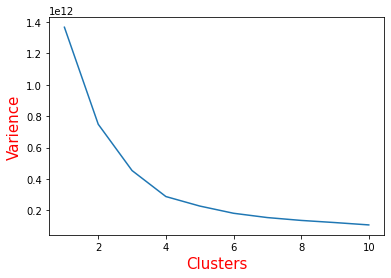

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),WCSS)
plt.xlabel('Clusters',size=15,color='red')
plt.ylabel('Varience',size=15,color='red')
plt.show()

In [ ]:
data1=KMeans(n_clusters=6,init='k-means++',random_state=42)
output=data1.fit_predict(x)
output

array([1, 5, 5, 4, 5, 0, 5, 4, 3, 0, 0, 0, 3, 4, 0, 0, 0, 3, 4, 4, 4, 3,
       4, 0, 4, 0, 0, 4, 3, 4, 4, 4, 3, 0, 4, 4, 0, 3, 0, 4, 3, 4, 0, 0,
       0, 3, 3, 0, 4, 3, 0, 0, 3, 0, 3, 0, 4, 4, 3, 3, 4, 4, 0, 3, 0, 0,
       3, 3, 0, 0, 4, 4, 4, 4, 4, 3, 3, 3, 0, 4, 3, 4, 0, 4, 3, 3, 0, 4,
       4, 0, 4, 0, 4, 3, 3, 4, 4, 0, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 0,
       3, 3, 3, 4, 4, 4, 3, 4, 3, 3, 4, 4, 3, 0, 0, 4, 4, 0, 4, 0, 4, 0,
       4, 4, 4, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 4, 0, 3, 3, 4, 3, 3, 3, 0,
       3, 4, 4, 0, 4, 0, 0, 3, 3, 0, 0, 4, 3, 4, 4, 0, 3, 3, 4, 4, 4, 4,
       4, 4, 0, 4, 0, 3, 0, 3, 3, 3, 3, 4, 0, 0, 0, 0, 3, 4, 4, 3, 0, 4,
       4, 4, 3, 4, 4, 0, 4, 3, 3, 4, 4, 3, 0, 0, 3, 0, 0, 4, 0, 4, 4, 0,
       3, 3, 3, 0, 3, 0, 0, 0, 0, 4, 0, 3, 3, 4, 4, 3, 0, 4, 0, 4, 0, 3,
       4, 3, 4, 3, 0, 4, 0, 4, 4, 4, 4, 0, 4, 4, 0, 4, 0, 4, 3, 4, 3, 0,
       4, 4, 0, 4, 3, 0, 0, 0, 0, 0, 4, 0, 4, 4, 3, 0, 4, 4, 3, 0, 0, 3,
       0, 3, 0, 3, 0, 3, 4, 4, 3, 0, 4, 3, 4, 0, 3,

In [ ]:
x['cluster']=output
x

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,cluster
0,87073,100000,2,1,1,1
1,38414,50000,3,0,10,5
2,17341,50000,7,1,3,5
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,5
...,...,...,...,...,...,...
655,51108,99000,10,1,10,5
656,60732,84000,10,1,13,5
657,53834,145000,8,1,9,2
658,80655,172000,10,1,15,2
